# Description

In this notebook you'll find a way to download the data.  
Both data with jet and without are downloaded here and are stored in the previously defined folder : data1 and data0 respectively.  
The steps are the following :  
- Importing csv file that contain the date and the cutout wanted for the image
- Making the request to the JSOC server for the wanted duration (30 images)
- Getting the numpy array from the requested files
- Transforming the array to perform a MaxPool2D (convolution over the image to deacrease its size from 500x500 to 166x166)
- Storing the image into a numpy array using a compressed version  


**Somes infos :**  
`Total number of events` = 1766  
`Downloading rate` : 2mins / event --> total = 59 hours (2,5 days !!!!)  
`File data storage` = 900 Ko  
`Total storage` = 1,6 Go   

Problem : Get stuck during the enumeration of events 

# Import functions and libraries

In [2]:
import pandas as pd
import numpy as np
from functions_AIA import *

# Run AIA requests

## First the data with jet (data1)

In [ ]:
data1=load_data()
num_images=30
jsoc_email="adrien.joliat@epfl.ch"

events_list = data1.iloc[:15]
for i in events_list.index:
    files = get_images(data1.iloc[i], num_images, jsoc_email) # selects data line i
    # "files" is (class <parfive>) and contains N <HDUList> objects (where N is the nb of images in the sequence) 
    # that we open as "f". The attribute f.data returns a numpy array in our case, bc the data is an image.
    # sequence_array is a 3D array of shape (166, 166, N) which contains all the pixel values for one line of data (~ 1 event)
    sequence_array = array_file(files) #torch array of the whole sequency event

    #Save the array
    np.savez_compressed("./data1/"+str(i)+".npz" , sequence_array)
    
    # Check the size of final array
    print(f"Download = {i+1}/{len(events_list.index)} and array ={sequence_array.shape}")

## Secondly, data without jet (data0)

In [ ]:
data0=load_data_nojet()
num_images=30
jsoc_email="adrien.joliat@epfl.ch"

events_list = data0.iloc[:15]
for i in events_list.index:
    files = get_images(data0.iloc[i], num_images, jsoc_email) # selects data line i
    # "files" is (class <parfive>) and contains N <HDUList> objects (where N is the nb of images in the sequence) 
    # that we open as "f". The attribute f.data returns a numpy array in our case, bc the data is an image.
    # sequence_array is a array of shape (166, 166, N) which contains all the pixel values for one line of data (~ 1 event)
    sequence_array = array_file(files) #torch array of the whole sequency event

    #Save the array
    np.savez_compressed("./data0/"+str(i)+".npz" , sequence_array)
    
    # Check the size of final array
    print(f"Download = {i+1}/{len(events_list.index)} and array ={sequence_array.shape}")

## Access data 

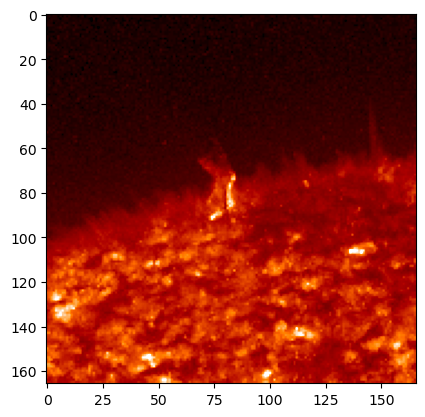

In [3]:
archive= np.load("./data1/0.npz")
array=archive["arr_0"]
plot_array(array[:,:,20])